In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

In [2]:
cv=pd.read_csv('Covid_data.csv', parse_dates=['Date'])
cv

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
ag=pd.read_csv('Age_Covid_data.csv')
ag

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
cv.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [5]:
cv.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [6]:
cv['Total Tests']=cv['Total Tests'].fillna(cv['Total Tests'].mean())
cv['Total Cases']=cv['Total Cases'].fillna(cv['Total Cases'].mean())
cv['Total Deaths']=cv['Total Deaths'].fillna(cv['Total Deaths'].mean())
cv['Total Recovered']=cv['Total Recovered'].fillna(cv['Total Recovered'].mean())
cv['Serious or Critical']=cv['Serious or Critical'].fillna(cv['Serious or Critical'].mean())
cv['Active Cases']=cv['Active Cases'].fillna(cv['Active Cases'].mean())

#or we can use loop function which will be
df=cv.isnull().sum()
col=cv.columns
for i in range(len(df)):
    if(df[i]>0):
        cv[col[i]]=cv[col[i]].fillna(cv[col[i]].mean())

In [7]:
cv.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [8]:
cv.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [9]:
df=pd.DataFrame()
df['Day']=cv['Date'].dt.day_name()
df['Month']=cv['Date'].dt.month_name()

In [10]:
df

,Day,Month
0,Saturday,April
1,Saturday,April
2,Saturday,April
3,Saturday,April
4,Saturday,April
...,...,...
6598,Monday,May
6599,Monday,May
6600,Monday,May
6601,Monday,May


In [11]:
cd=pd.concat([cv,df], axis=1)

In [12]:
cd=cd.drop(['Date'], axis=1)

In [13]:
cd

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month
0,USA,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0,Saturday,April
1,Russia,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0,Saturday,April
2,Spain,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0,Saturday,April
3,Brazil,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0,Saturday,April
4,UK,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0,Saturday,April
...,...,...,...,...,...,...,...,...,...,...
6598,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,Monday,May
6599,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,Monday,May
6600,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0,Monday,May
6601,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0,Monday,May


In [14]:
cd.dtypes

Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
Day                     object
Month                   object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cd['Country']=le.fit_transform(cd['Country'])
cd['Day']=le.fit_transform(cd['Day'])
cd['Month']=le.fit_transform(cd['Month'])

In [16]:
cd.dtypes

Country                  int32
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
Day                      int32
Month                    int32
dtype: object

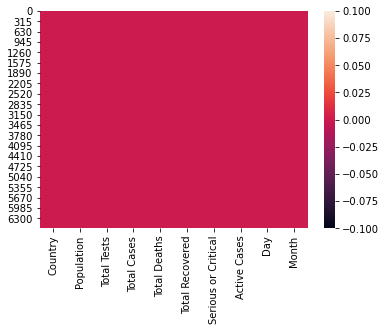

In [17]:
sns.heatmap(cd.isnull())

In [18]:
cd.describe()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month
count,6603.000000,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000
mean,106.000000,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,2.903226,0.580645
std,61.491783,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04,1.940463,0.493491
min,0.000000,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,53.000000,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01,1.000000,0.000000
50%,106.000000,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02,3.000000,1.000000
75%,159.000000,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03,5.000000,1.000000
max,212.000000,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,6.000000,1.000000


In [19]:
cd.corr()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month
Country,1.000000e+00,-2.867433e-02,0.143290,0.117565,0.116034,0.064000,0.080346,0.125181,8.983622e-18,5.319977e-19
Population,-2.867433e-02,1.000000e+00,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359,5.479849e-18,2.669124e-17
Total Tests,1.432900e-01,2.237353e-01,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809,-6.783316e-03,6.394901e-02
Total Cases,1.175655e-01,2.258444e-01,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361,-3.223938e-03,3.363032e-02
Total Deaths,1.160336e-01,1.767733e-01,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732,-1.586807e-03,2.746937e-02
Total Recovered,6.400028e-02,3.093609e-01,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265,-6.167316e-03,6.416855e-02
Serious or Critical,8.034605e-02,1.704606e-01,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204,1.591875e-03,-1.379096e-02
Active Cases,1.251805e-01,1.793593e-01,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000,-8.167246e-04,1.709871e-02
Day,8.983622e-18,5.479849e-18,-0.006783,-0.003224,-0.001587,-0.006167,0.001592,-0.000817,1.000000e+00,-1.434603e-01
Month,5.319977e-19,2.669124e-17,0.063949,0.033630,0.027469,0.064169,-0.013791,0.017099,-1.434603e-01,1.000000e+00


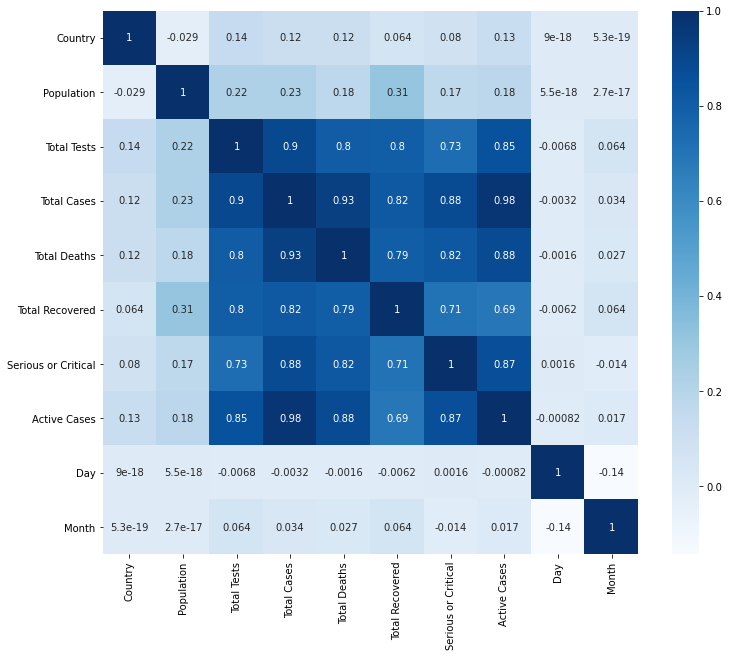

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(cd.corr(), cmap='Blues', annot=True)

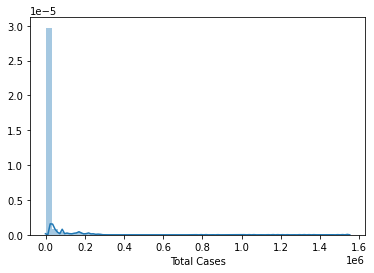

In [21]:
sns.distplot(cd['Total Cases'])

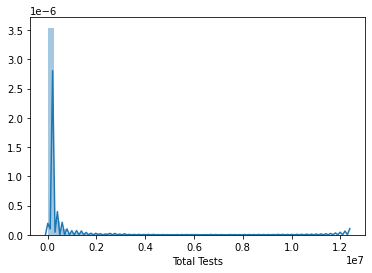

In [22]:
sns.distplot(cd['Total Tests'])

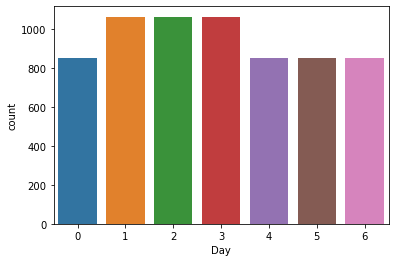

In [23]:
sns.countplot(cd['Day'])

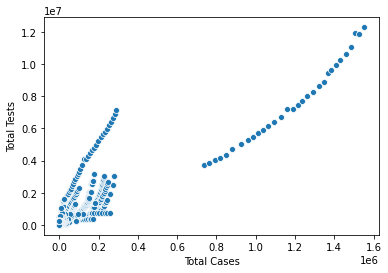

In [24]:
sns.scatterplot(x='Total Cases', y='Total Tests', data=cd)

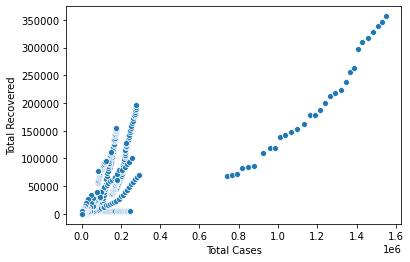

In [25]:
sns.scatterplot(x='Total Cases', y='Total Recovered', data=cd)

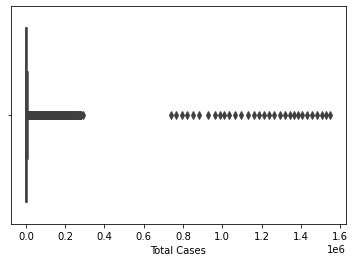

In [26]:
sns.boxplot(cd['Total Cases'])

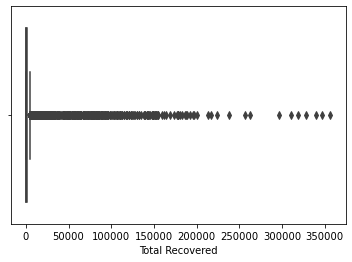

In [27]:
sns.boxplot(cd['Total Recovered'])

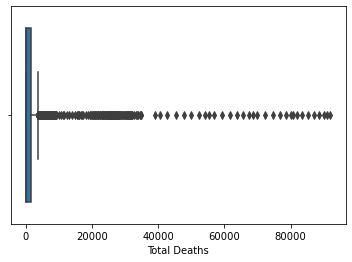

In [28]:
sns.boxplot(cd['Total Deaths'])

In [29]:
from scipy.stats import  zscore
z=np.abs(zscore(cd))
co=cd[(z<3).all(axis=1)]
co

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month
1,158,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0,2,0
4,200,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0,2,0
8,197,84230075,5.989330e+05,82329.0,1890.000000,10453.000000,1894.00000,69986.0,2,0
9,93,83862642,3.301370e+05,80868.0,5031.000000,55987.000000,3513.00000,19850.0,2,0
11,152,32915899,1.358950e+05,14420.0,348.000000,6684.000000,117.00000,7388.0,2,0
...,...,...,...,...,...,...,...,...,...,...
6598,182,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,1,1
6599,209,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,1,1
6600,5,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0,1,1
6601,110,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0,1,1


In [30]:
co.skew()

Country               -0.011884
Population             3.880217
Total Tests            3.860036
Total Cases            5.183936
Total Deaths           6.225914
Total Recovered        6.921157
Serious or Critical    4.274869
Active Cases           6.120409
Day                    0.109536
Month                 -0.314476
dtype: float64

In [31]:
ci=co.copy()

In [32]:
ci['Population']=np.log1p(ci['Population'])
ci['Total Tests']=np.log1p(ci['Total Tests'])
ci['Total Deaths']=np.log1p(ci['Total Deaths'])
ci['Total Cases']=np.log1p(ci['Total Cases'])
ci['Serious or Critical']=np.log1p(ci['Serious or Critical'])
ci['Active Cases']=np.log1p(ci['Active Cases'])

In [33]:
ci['Total Recovered']=np.log1p(ci['Total Recovered'])

(array([5.595e+03, 4.040e+02, 1.360e+02, 6.800e+01, 1.800e+01, 1.400e+01,
        1.700e+01, 5.000e+00, 7.000e+00, 8.000e+00]),
 array([1.000000e+00, 1.380870e+04, 2.761640e+04, 4.142410e+04,
        5.523180e+04, 6.903950e+04, 8.284720e+04, 9.665490e+04,
        1.104626e+05, 1.242703e+05, 1.380780e+05]),
 <a list of 10 Patch objects>)

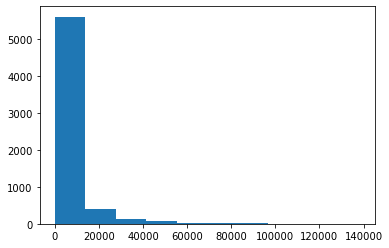

In [34]:
plt.hist(co['Total Cases'])

(array([ 130.,  689.,  600.,  876.,  860., 1037.,  723.,  723.,  523.,
         111.]),
 array([ 0.69314718,  1.80739059,  2.921634  ,  4.03587741,  5.15012081,
         6.26436422,  7.37860763,  8.49285104,  9.60709445, 10.72133786,
        11.83558126]),
 <a list of 10 Patch objects>)

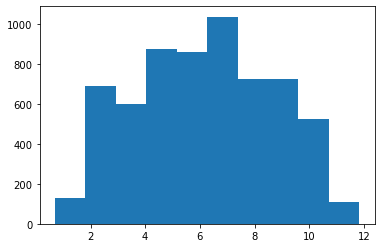

In [35]:
plt.hist(ci['Total Cases'])

(array([5.903e+03, 2.310e+02, 5.600e+01, 4.600e+01, 1.300e+01, 5.000e+00,
        1.000e+00, 3.000e+00, 6.000e+00, 8.000e+00]),
 array([1.0000e+00, 7.3800e+03, 1.4759e+04, 2.2138e+04, 2.9517e+04,
        3.6896e+04, 4.4275e+04, 5.1654e+04, 5.9033e+04, 6.6412e+04,
        7.3791e+04]),
 <a list of 10 Patch objects>)

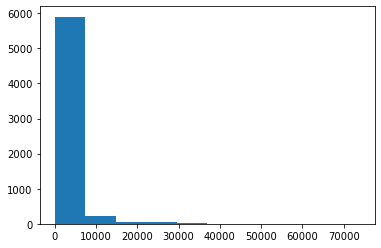

In [36]:
plt.hist(co['Total Recovered'])

(array([313., 960., 675., 886., 861., 838., 738., 691., 250.,  60.]),
 array([ 0.69314718,  1.74473302,  2.79631887,  3.84790471,  4.89949055,
         5.95107639,  7.00266223,  8.05424808,  9.10583392, 10.15741976,
        11.2090056 ]),
 <a list of 10 Patch objects>)

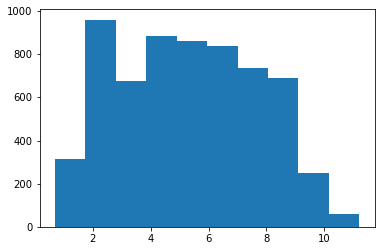

In [37]:
plt.hist(ci['Total Recovered'])

In [38]:
ci.skew()

Country               -0.011884
Population            -0.794105
Total Tests           -0.647380
Total Cases           -0.018856
Total Deaths           0.143726
Total Recovered        0.064313
Serious or Critical   -0.367581
Active Cases          -0.080849
Day                    0.109536
Month                 -0.314476
dtype: float64

In [39]:
x=ci.drop(['Active Cases'], axis=1)
y=ci['Active Cases']

In [40]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)
x

array([[ 0.85256751,  1.53439348,  1.81523963, ..., -0.8873063 ,
        -0.46637111, -1.16948105],
       [ 1.5357502 ,  1.22332352,  1.23905492, ...,  1.61279451,
        -0.46637111, -1.16948105],
       [ 1.48695144,  1.31118961,  1.34877915, ...,  1.70713626,
        -0.46637111, -1.16948105],
       ...,
       [-1.63616943, -2.19555666,  0.92464271, ...,  0.9376819 ,
        -0.98180363,  0.85508013],
       [ 0.0717873 , -0.18046162,  0.92464271, ...,  0.9376819 ,
        -0.98180363,  0.85508013],
       [ 0.96643129, -2.5812949 ,  0.92464271, ...,  0.9376819 ,
        -0.98180363,  0.85508013]])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
max_scr=0
for rstate in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_y)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for the rstate', rstate,'to max r2 scr is',max_scr)

The corresponding value for the rstate 100 to max r2 scr is 0.927628377959695


In [42]:
from sklearn.model_selection import cross_val_score
crs_val_scr=cross_val_score(lr,x,y,scoring='r2', cv=10).mean()
crs_val_scr

0.9192504503684175

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.9158919109557349
{'alpha': 0.01}
0.9160571007987899


In [44]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean sqaured error', mean_squared_error(y_test,pred_y))

r2 score 0.922135357922752
mean sqaured error 0.6032879710839637


In [45]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_y=rd.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean sqaured error', mean_squared_error(y_test,pred_y))

r2 score 0.9223250827822105
mean sqaured error 0.6018180006009134


In [48]:
df1=pd.DataFrame(pred_y)
df1.to_csv('lr_prediction.csv')

In [50]:
import joblib
joblib.dump(lr,'lr_Covid.pkl')

['lr_Covid.pkl']